# **Mục tiêu**

Mục tiêu của công việc này là thực hiện phân nhóm khách hàng để tạo ra các đoạn đối tượng. Phân khúc khách hàng là quá trình chia khách hàng thành các nhóm/cụm thể hiện sự tương đồng giữa các khách hàng trong mỗi nhóm. Điều này có thể giúp doanh nghiệp thực hiện các hoạt động tốt hơn cho khách hàng dựa trên hành vi của họ.

# **The Dataset**

The dataset used in this work is taken from kaggle dataset (https://www.kaggle.com/datasets/mahdinavaei/customermarketing).

Mô tả Cột:

* ID: Định danh duy nhất của khách hàng
* Year_Birth: Năm sinh của khách hàng
* Education: Trình độ học vấn của khách hàng
* Marital_Status: Tình trạng hôn nhân của khách hàng
* Income: Thu nhập hàng năm của hộ gia đình khách hàng
* Kidhome: Số lượng trẻ em trong hộ gia đình của khách hàng
* Teenhome: Số lượng thanh thiếu niên trong hộ gia đình của khách hàng
* Dt_Customer: Ngày đăng ký của khách hàng với công ty
* Recency: Số ngày kể từ lần mua cuối cùng của khách hàng
* Complain: 1 nếu khách hàng phàn nàn trong vòng 2 năm qua, 0 nếu ngược lại
* MntWines: Số tiền chi tiêu cho rượu trong 2 năm qua
* MntFruits: Số tiền chi tiêu cho trái cây trong 2 năm qua
* MntMeatProducts: Số tiền chi tiêu cho thịt trong 2 năm qua
* MntFishProducts: Số tiền chi tiêu cho cá trong 2 năm qua
* MntSweetProducts: Số tiền chi tiêu cho đồ ngọt trong 2 năm qua
* MntGoldProds: Số tiền chi tiêu cho vàng trong 2 năm qua
* NumDealsPurchases: Số lượng mua hàng với giảm giá
* AcceptedCmp1: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 1, 0 nếu ngược lại
* AcceptedCmp2: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 2, 0 nếu ngược lại
* AcceptedCmp3: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 3, 0 nếu ngược lại
* AcceptedCmp4: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 4, 0 nếu ngược lại
* AcceptedCmp5: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch 5, 0 nếu ngược lại
* Response: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch cuối cùng, 0 nếu ngược lại
* NumWebPurchases: Số lượng mua hàng thông qua trang web của công ty
* NumCatalogPurchases: Số lượng mua hàng sử dụng catalog
* NumStorePurchases: Số lượng mua hàng trực tiếp tại cửa hàng
* NumWebVisitsMonth: Số lượng lượt truy cập trang web của công ty trong tháng qua


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from matplotlib import colors
import numpy as np
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
import datetime
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import plotly.express as px
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [59]:
df= pd.DataFrame(pd.read_csv("D:/Machine Learning/thuc hanh/datasets/Customer marketing.csv", sep="\t"))
df

,ID_,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# **Tiền xử lí dữ liệu**

**Kiểm tra thuộc tính**


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_                  2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Kiểu dữ liệu của Dt_Customer là đối tượng, chúng ta cần chuyển đổi nó thành datetime.

In [61]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_                  2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

**Xử lí dữ liệu thiếu**

In [63]:
df.isna().sum()

ID_                     0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Xóa 24 dữ liệu NaN

In [64]:
df = df.dropna()

In [65]:
df.isna().sum()

ID_                    0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

**Kiểm tra các giá trị duy nhất cho mỗi cột**

In [66]:
for col in df.columns:
    print(col," : ",df[col].nunique())

ID_  :  2216
Year_Birth  :  59
Education  :  5
Marital_Status  :  8
Income  :  1974
Kidhome  :  3
Teenhome  :  3
Dt_Customer  :  662
Recency  :  100
MntWines  :  776
MntFruits  :  158
MntMeatProducts  :  554
MntFishProducts  :  182
MntSweetProducts  :  176
MntGoldProds  :  212
NumDealsPurchases  :  15
NumWebPurchases  :  15
NumCatalogPurchases  :  14
NumStorePurchases  :  14
NumWebVisitsMonth  :  16
AcceptedCmp3  :  2
AcceptedCmp4  :  2
AcceptedCmp5  :  2
AcceptedCmp1  :  2
AcceptedCmp2  :  2
Complain  :  2
Z_CostContact  :  1
Z_Revenue  :  1
Response  :  2


Z_Costcontact và Z_Revenue chỉ có 1 giá trị duy nhất. Vì vậy, bỏ những cột đó đi.

In [67]:
df = df.drop(['Z_CostContact','Z_Revenue','Dt_Customer'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_                  2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   int64 

**Tạo cột mới'Age' từ 'Year_Birth' , Sau đó xóa'Year_Birth'.**


In [68]:
df['Age'] = 2023 - df['Year_Birth']
df = df.drop('Year_Birth',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_                  2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   int64 

xu li nhieu

In [69]:
# df=df[df['Year_Birth']>1940]
df=df[df['Age']<82]
df=df[df['Income']<150000]
df=df[df['MntWines']<1150]
df=df[df['MntFruits']<75]
df=df[df['MntMeatProducts']<260]
df=df[df['MntFishProducts']<48]
df=df[df['MntSweetProducts']<30]
df=df[df['MntGoldProds']<70]
df=df[df['NumDealsPurchases']<7]

**Chuyển đổi kiểu dữ liệu**

**Kiểm tra cột: 'Education'**

In [56]:
df['Education'].value_counts()

Education
Graduation    560
PhD           278
Master        215
2n Cycle      107
Basic          50
Name: count, dtype: int64

In [57]:
# Convert to numeric
df['Education'] = df['Education'].replace({"Basic": 0, "2n Cycle":1, "Graduation": 2, "Master": 3, "PhD": 4})
df['Education'].value_counts()

Education
2    560
4    278
3    215
1    107
0     50
Name: count, dtype: int64

**Kiểm tra cột: Marital_Status**

In [105]:
df['Marital_Status'].value_counts()

Marital_Status
Married     477
Together    313
Single      251
Divorced    129
Widow        35
Alone         3
YOLO          2
Name: count, dtype: int64

In [22]:
# Create a new column
df['Living_With'] = df["Marital_Status"].replace({"Married":2, "Together":2, "Absurd":1, "Widow":1, "YOLO":1, "Divorced":1,'Single':1,'Alone':1})

# Drop Marital_Status column
df = df.drop('Marital_Status',axis=1)
df['Living_With'].value_counts()

Living_With
2    790
1    420
Name: count, dtype: int64

Tạo cột mới 'Children' kết hợp Kidhome and Teenhome.

In [24]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [25]:
# Drop Kidhome & Teenhome
df = df.drop(['Kidhome','Teenhome'],axis=1)

df['Children'].value_counts()

Children
1    716
2    329
0    130
3     35
Name: count, dtype: int64

**Tạo cột mới 'Family_Size'**

In [26]:
df['Family_Size'] = df['Living_With'] + df['Children']
df['Family_Size'].value_counts()

Family_Size
3    587
2    317
4    234
1     53
5     19
Name: count, dtype: int64

**Tạo cột mới 'Total_Spent'**


In [14]:
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntGoldProds'] + df['MntFishProducts']

**Tạo cột mới'Total_Accept' cho biết tổng số ưu đãi được khách hàng chấp nhận từ tất cả 6 chiến dịch.**

In [15]:
df['Total_Accept'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 1 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_                  1210 non-null   int64  
 1   Education            1210 non-null   object 
 2   Marital_Status       1210 non-null   object 
 3   Income               1210 non-null   float64
 4   Kidhome              1210 non-null   int64  
 5   Teenhome             1210 non-null   int64  
 6   Recency              1210 non-null   int64  
 7   MntWines             1210 non-null   int64  
 8   MntFruits            1210 non-null   int64  
 9   MntMeatProducts      1210 non-null   int64  
 10  MntFishProducts      1210 non-null   int64  
 11  MntSweetProducts     1210 non-null   int64  
 12  MntGoldProds         1210 non-null   int64  
 13  NumDealsPurchases    1210 non-null   int64  
 14  NumWebPurchases      1210 non-null   int64  
 15  NumCatalogPurchases  1210 non-null   int64 

In [27]:

df = df.drop(df[df['Income'] >100000].index)

In [28]:
from sklearn.preprocessing import LabelEncoder
df['Education']=LabelEncoder().fit_transform(df['Education'])


In [40]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Income','Age','Total_Spent','Family_Size']
binary_columns = ['Kidhome', 'Teenhome', 'Complain', 'Response']

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMax scaling to numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [41]:
df

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spent,Total_Accept,Living_With,Children,Family_Size
1,2,0.497053,0.383838,0.009582,0.014085,0.023346,0.042553,0.034483,0.086957,0.333333,...,0,0,0,0,0.807692,0.014706,0,1,2,0.50
3,2,0.268517,0.262626,0.009582,0.056338,0.077821,0.212766,0.103448,0.072464,0.333333,...,0,0,0,0,0.230769,0.032086,0,2,1,0.50
4,4,0.635685,0.949495,0.150697,0.605634,0.459144,0.978723,0.931034,0.217391,0.833333,...,0,0,0,0,0.288462,0.278743,0,2,1,0.50
7,4,0.347503,0.323232,0.066202,0.140845,0.217899,0.063830,0.034483,0.333333,0.333333,...,0,0,0,0,0.211538,0.109626,0,2,1,0.50
8,4,0.311502,0.191919,0.012195,0.000000,0.093385,0.063830,0.103448,0.028986,0.166667,...,0,0,0,1,0.423077,0.027406,1,2,1,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,3,0.479163,0.717172,0.743031,0.140845,0.556420,0.276596,0.344828,0.289855,0.333333,...,0,0,0,0,0.500000,0.697861,0,1,0,0.00
2232,2,0.270489,0.505051,0.004355,0.014085,0.023346,0.063830,0.137931,0.043478,0.166667,...,0,0,0,0,0.192308,0.011364,0,1,0,0.00
2234,2,0.358722,0.818182,0.002613,0.042254,0.027237,0.127660,0.068966,0.130435,0.166667,...,0,0,0,0,0.423077,0.016711,0,2,1,0.50
2237,2,0.620464,0.919192,0.790941,0.676056,0.844358,0.680851,0.413793,0.347826,0.166667,...,0,0,0,0,0.288462,0.826203,1,1,0,0.00


In [43]:
# luu du lieu sau tien xu li
df.to_csv("D:/DO_an_Ml/UNSUPERVISED LEARNING/Customer marketing_processed.csv")

# **Trực quan hóa dữ liệu**
Biểu đồ phân phối tần suất (Histograms):

Income: Biểu diễn phân phối thu nhập của khách hàng. Đường cong KDE (Kernel Density Estimation) được sử dụng để ước lượng hàm mật độ xác suất của dữ liệu.

Recency: Cho thấy tần suất của các giá trị "Recency" (khoảng thời gian kể từ lần mua gần nhất). Histogram giúp hiểu rõ phân phối của thời gian giữa các lần mua.

Biểu đồ đường (Line Plot):

Recency vs Income: Mô tả mối quan hệ giữa thời gian kể từ lần mua gần nhất và thu nhập. Biểu đồ đường giúp nhìn nhận xu hướng hoặc sự biến động của dữ liệu theo thời gian.
Biểu đồ tròn (Pie Chart):

Education: Hiển thị phân phối học vấn của khách hàng theo tỉ lệ phần trăm. Pie chart là một cách tốt để thấy tỷ lệ giữa các nhóm trong biến phân loại.
Biểu đồ điểm (Scatter Plot):

Wines vs Fruits: Biểu diễn quan hệ giữa việc mua rượu và mua hoa quả. Màu sắc được sử dụng để phân loại theo phản hồi, giúp nhận biết các điểm dữ liệu thuộc các nhóm khác nhau.
Biểu đồ bong bóng (Bubble Plot):

Income vs Recency: Mô tả mối quan hệ giữa thu nhập và thời gian kể từ lần mua gần nhất. Kích thước của bong bóng đại diện cho mức độ mua thịt của khách hàng, làm nổi bật sự biến động của một biến thứ ba.
Biểu đồ cột (Count Plot):

Education: Hiển thị số lượng khách hàng thuộc mỗi mức học vấn. Giúp xác định phân phối của dữ liệu trong biến phân loại.
Biểu đồ mật độ (Density Plot):

Recency vs Income: Hiển thị mật độ của các điểm dữ liệu trên một không gian 2D. Màu sắc thể hiện độ chập chững của mật độ, giúp nhận biết các vùng có mật độ dữ liệu cao.

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarn

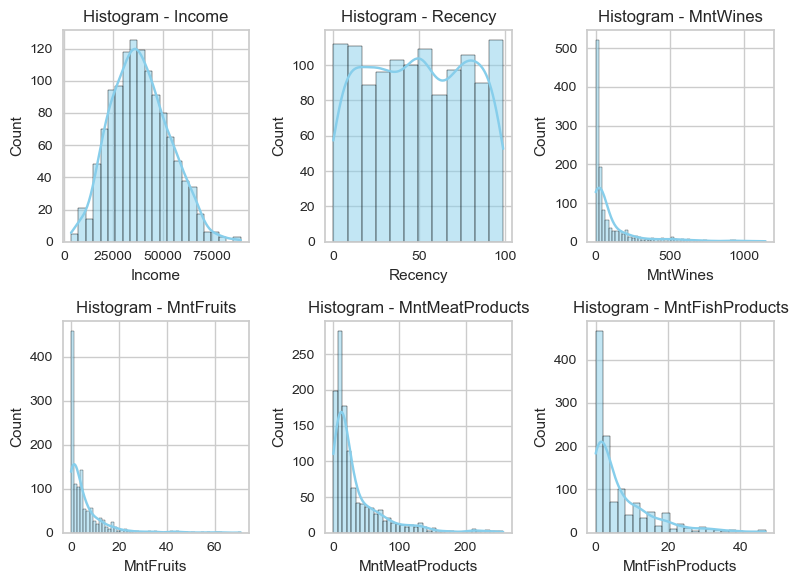

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



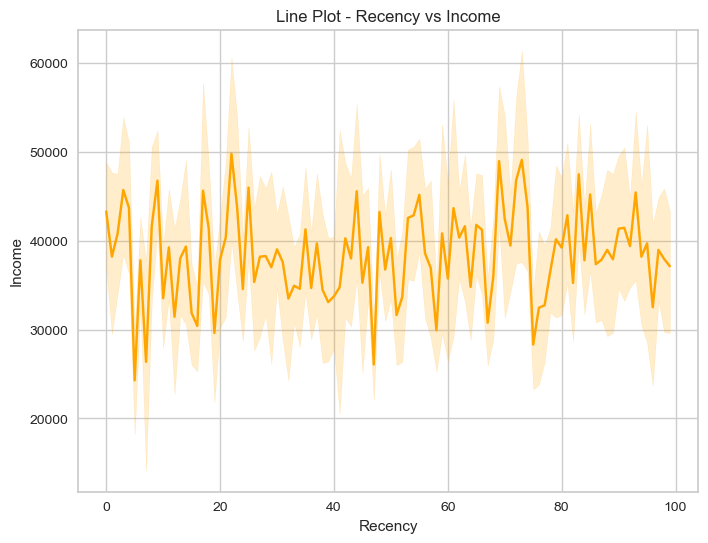

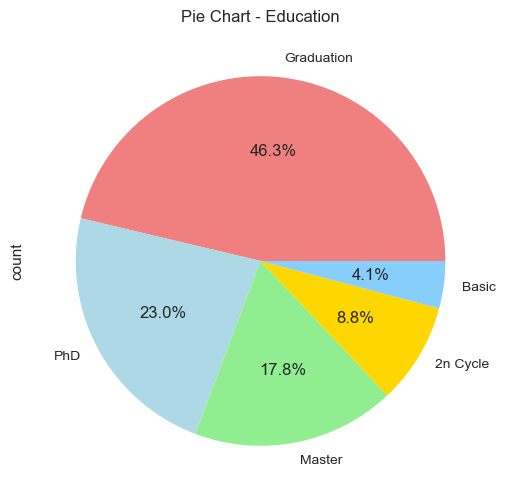

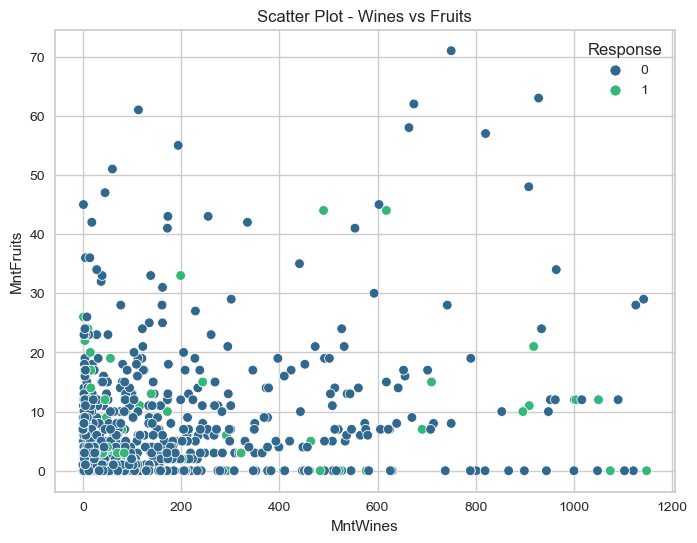

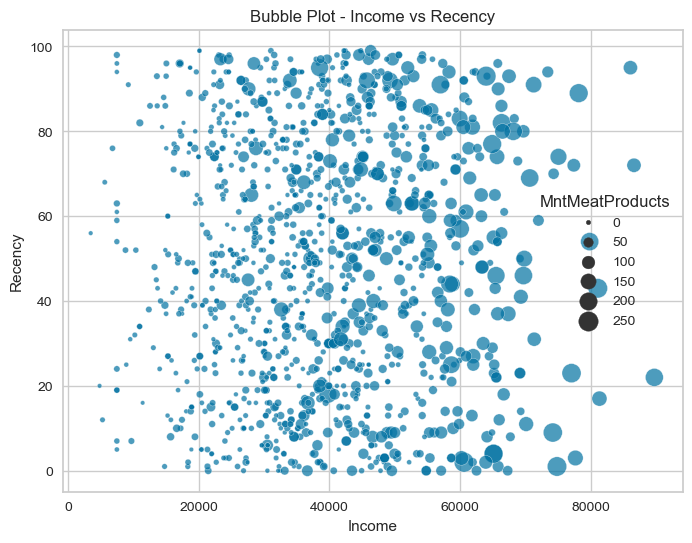

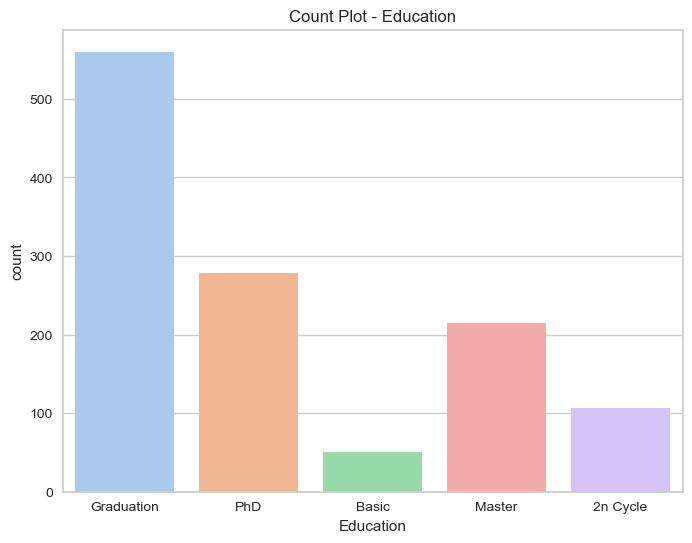

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



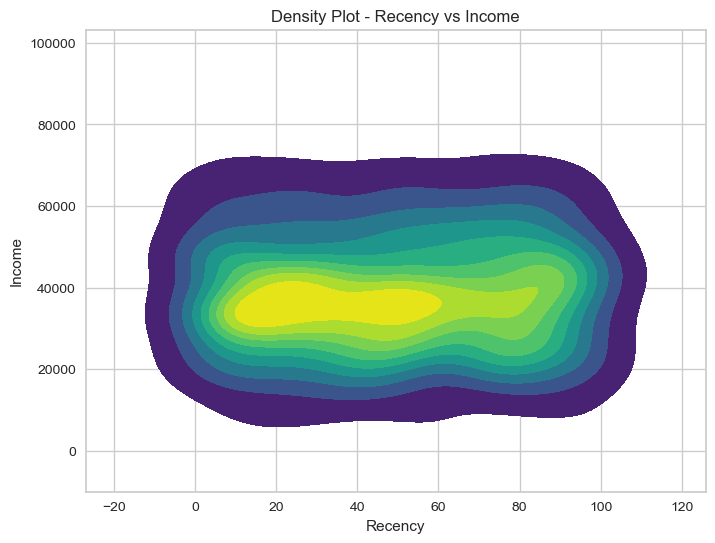

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lựa chọn các cột phù hợp
numeric_columns = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']
categorical_columns = ['Education', 'Marital_Status']
binary_columns = ['Kidhome', 'Teenhome', 'Complain', 'Response']

# Biểu đồ cột
plt.figure(figsize=(8, 6))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram - {col}')
plt.tight_layout()
plt.show()

# Biểu đồ đường
plt.figure(figsize=(8, 6))
sns.lineplot(x='Recency', y='Income', data=df, color='orange')
plt.title('Line Plot - Recency vs Income')
plt.show()

# Biểu đồ tròn
plt.figure(figsize=(8, 6))
df['Education'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['lightcoral', 'lightblue', 'lightgreen', 'gold', 'lightskyblue'])
plt.title('Pie Chart - Education')
plt.show()


# Biểu đồ điểm
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MntWines', y='MntFruits', data=df, hue='Response', palette='viridis')
plt.title('Scatter Plot - Wines vs Fruits')
plt.show()

# Biểu đồ bong bóng
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Recency', data=df, size='MntMeatProducts', sizes=(10, 200), alpha=0.7)
plt.title('Bubble Plot - Income vs Recency')
plt.show()

# Biểu đồ phân phối tần suất
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=df, palette='pastel')
plt.title('Count Plot - Education')
plt.show()



# Biểu đồ mật độ
plt.figure(figsize=(8, 6))
sns.kdeplot(x='Recency', y='Income', data=df, cmap='viridis', fill=True)
plt.title('Density Plot - Recency vs Income')
plt.show()




**Tạo bản đồ nhiệt hiển thị mối tương quan giữa các tính năng**

In [64]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID_,1210.0,5591.499174,3262.230339,1.0,2805.75,5464.5,8403.00,11191.0
Income,1210.0,38575.161157,14701.136968,3502.0,27897.25,37665.0,48432.00,89694.0
Recency,1210.0,49.136364,29.216718,0.0,24.00,49.0,75.00,99.0
MntWines,1210.0,121.675207,209.680882,0.0,10.00,29.5,127.75,1148.0
MntFruits,1210.0,5.796694,8.783773,0.0,0.00,3.0,7.00,71.0
MntMeatProducts,1210.0,35.395868,43.369375,0.0,9.00,18.0,46.00,257.0
MntFishProducts,1210.0,7.192562,8.792721,0.0,0.00,4.0,11.00,47.0
MntSweetProducts,1210.0,5.028926,6.211065,0.0,0.00,3.0,7.00,29.0
MntGoldProds,1210.0,16.196694,14.958260,0.0,5.00,12.0,23.00,69.0
NumDealsPurchases,1210.0,2.200826,1.317377,0.0,1.00,2.0,3.00,6.0


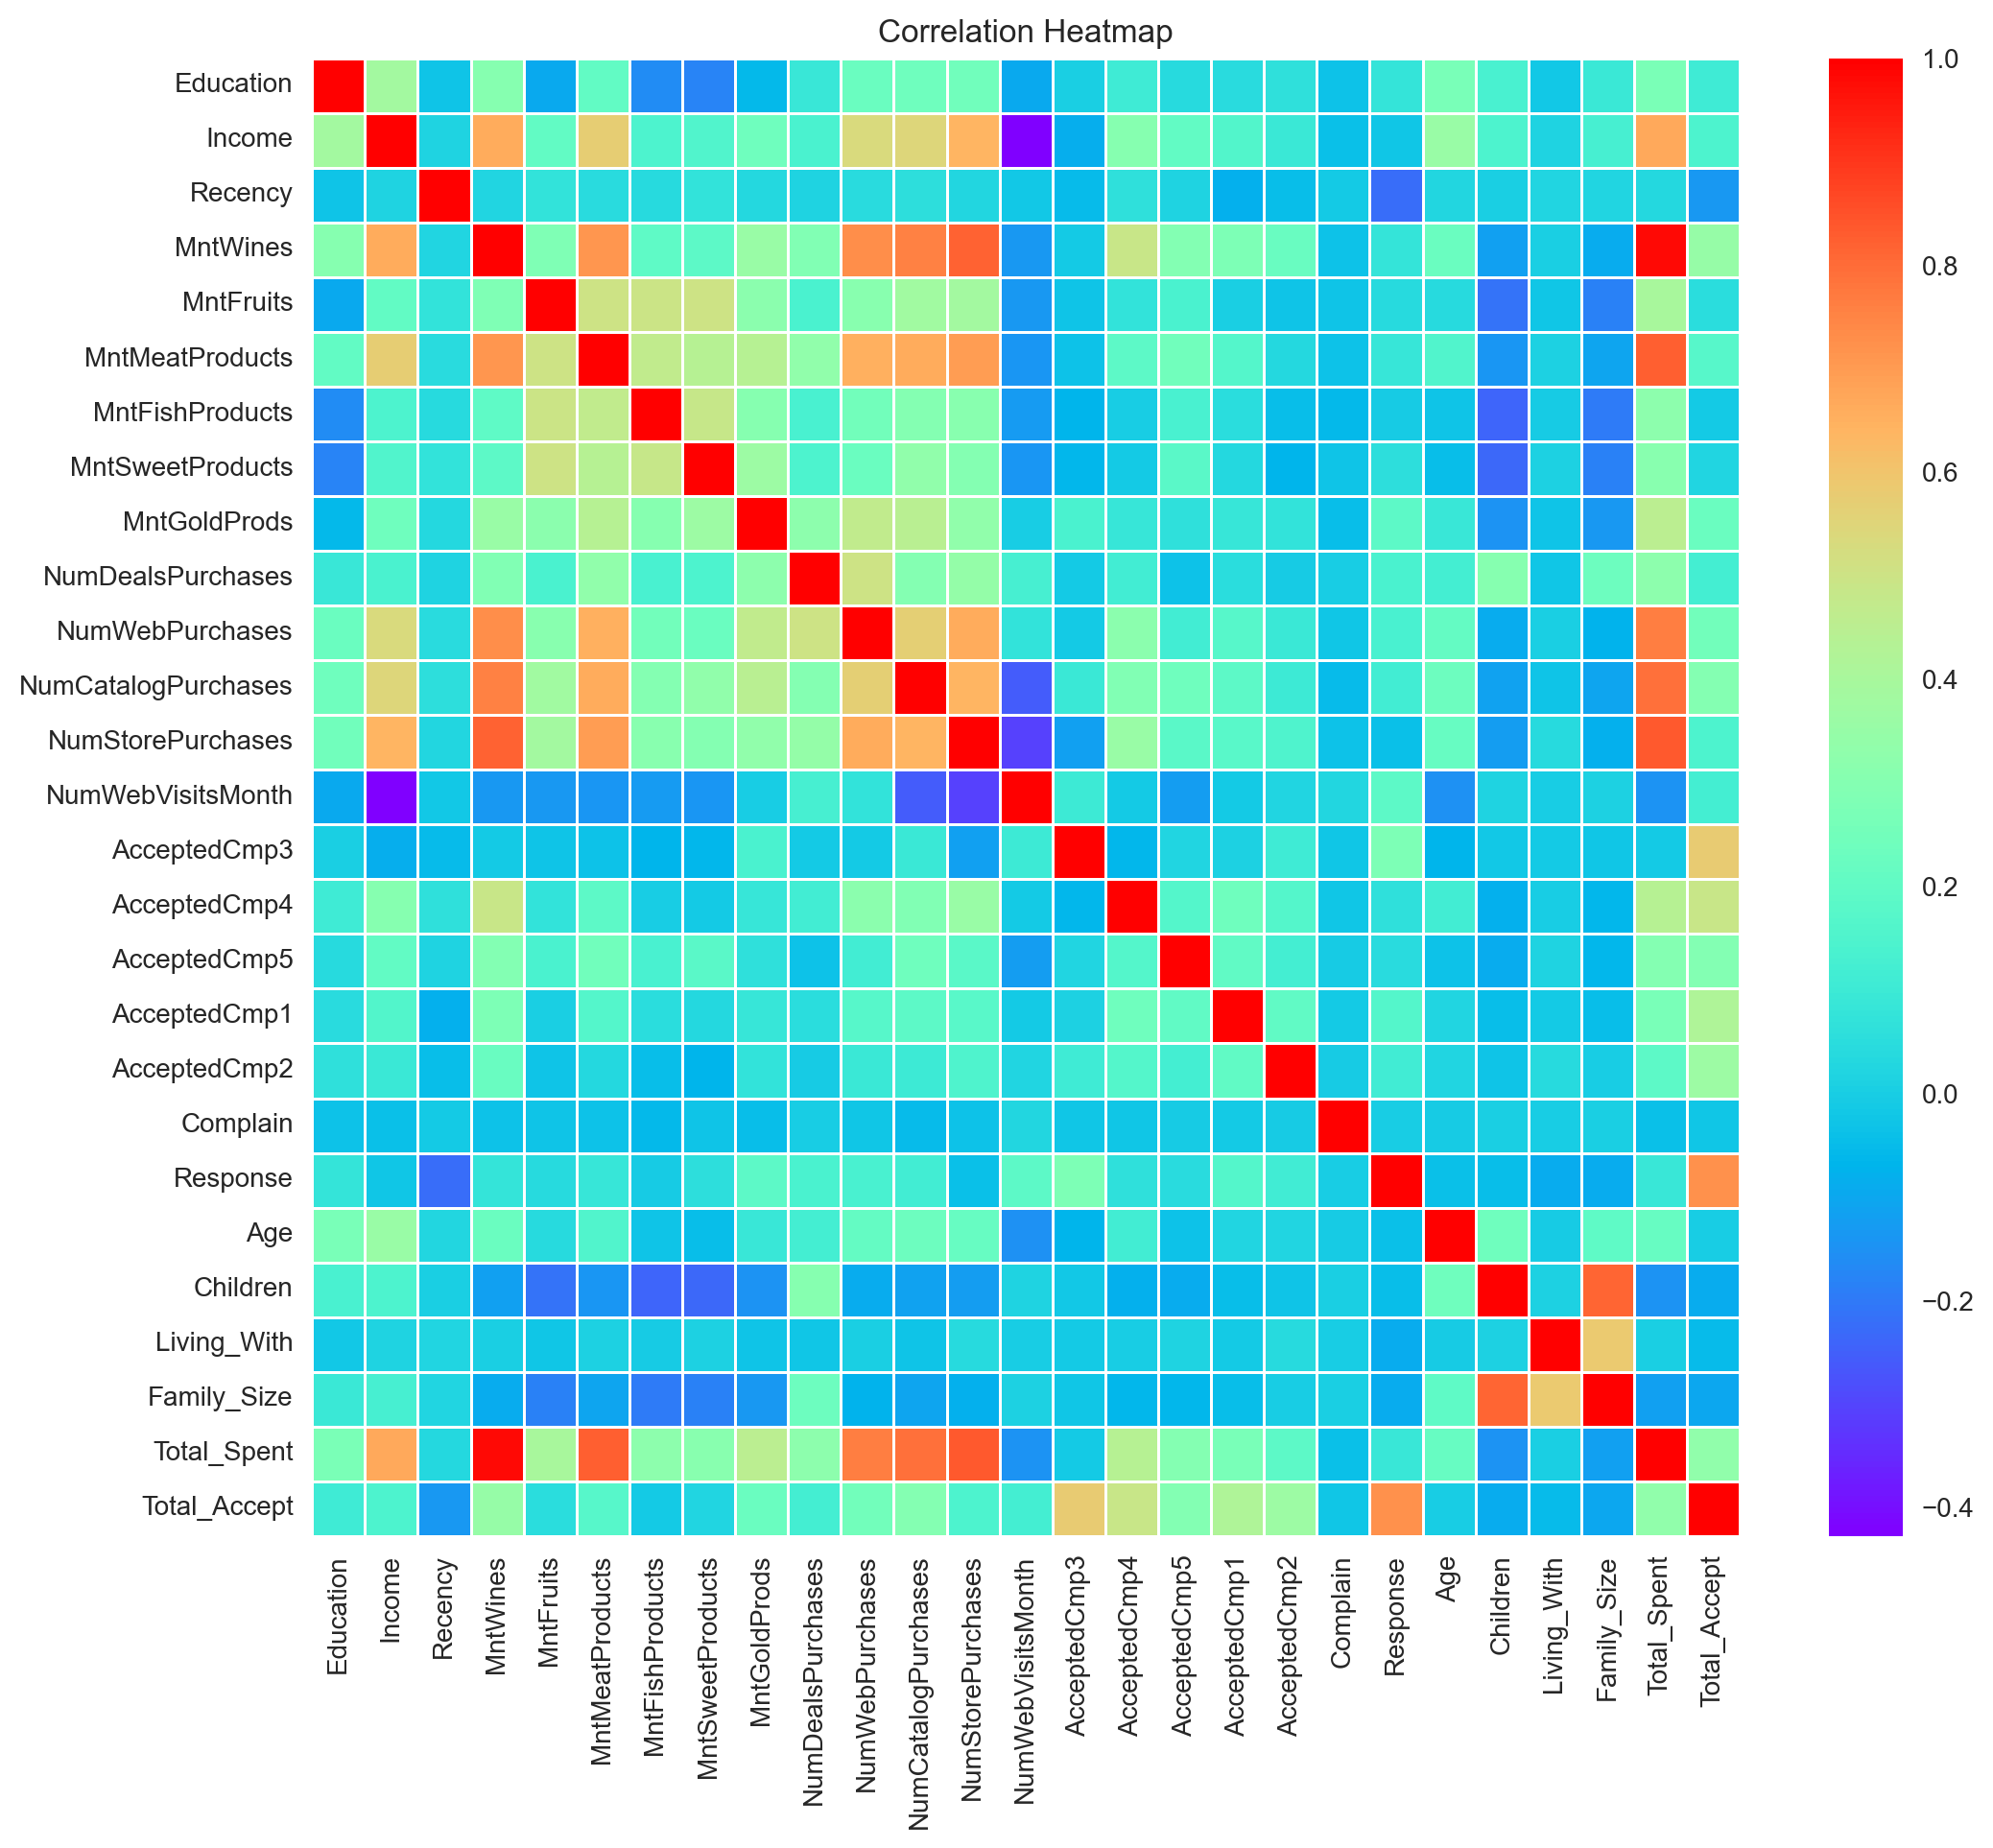

In [87]:
plt.figure(figsize=(12,10),dpi=200)
sns.heatmap(df.drop('ID_',axis=1).corr(), cmap='rainbow', fmt=".2f", linewidths=.5)

# # Tạo heatmap
# plt.figure(figsize=(16, 12))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()